In [1]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [2]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 86.4MB/s]


In [3]:
model.eval()


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [4]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'

--2024-08-30 15:17:10--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.29.78, 3.5.29.64, 52.217.66.92, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.29.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg’

000000037777.jpg    100%[===================>]  39.88K  --.-KB/s    in 0.07s   

2024-08-30 15:17:10 (612 KB/s) - ‘000000037777.jpg’ saved [40833/40833]



In [5]:
ig = Image.open("/content/000000037777.jpg")

In [6]:
transform = T.ToTensor()
img = transform(ig)

In [7]:
with torch.no_grad():
  pred= model([img])

In [8]:
pred

[{'boxes': tensor([[291.8007,  75.4907, 351.0379, 229.7333],
          [137.4995, 126.4641, 196.7451, 192.7782],
          [233.8998, 187.4761, 257.3713, 206.0314],
          [ 90.1806, 183.4493, 288.7284, 227.4105],
          [215.5326, 186.7111, 232.5018, 201.2200],
          [229.1946, 178.4547, 242.4028, 189.1366],
          [204.3889, 187.5528, 220.3058, 207.7724],
          [231.4346, 200.6802, 247.8696, 217.5509],
          [217.1698, 200.3502, 231.5009, 214.5559],
          [204.0359, 181.5956, 255.1724, 215.4856],
          [ 98.9669, 120.1149, 110.5809, 174.5164],
          [102.2467, 119.0014, 109.8358, 135.8731],
          [264.9863, 133.9124, 294.1249, 137.5284],
          [232.7792, 188.8490, 246.7510, 200.8903],
          [256.4788, 132.5554, 295.4839, 138.3106],
          [175.0202, 110.8700, 185.6927, 137.3661],
          [273.3569, 135.1965, 294.8690, 137.8414],
          [263.4073, 128.6209, 298.7946, 137.3732],
          [197.2355, 181.2733, 263.8224, 219.3763],
   

In [9]:
type(pred)

list

In [10]:
len(pred)

1

In [11]:
pred[0]

{'boxes': tensor([[291.8007,  75.4907, 351.0379, 229.7333],
         [137.4995, 126.4641, 196.7451, 192.7782],
         [233.8998, 187.4761, 257.3713, 206.0314],
         [ 90.1806, 183.4493, 288.7284, 227.4105],
         [215.5326, 186.7111, 232.5018, 201.2200],
         [229.1946, 178.4547, 242.4028, 189.1366],
         [204.3889, 187.5528, 220.3058, 207.7724],
         [231.4346, 200.6802, 247.8696, 217.5509],
         [217.1698, 200.3502, 231.5009, 214.5559],
         [204.0359, 181.5956, 255.1724, 215.4856],
         [ 98.9669, 120.1149, 110.5809, 174.5164],
         [102.2467, 119.0014, 109.8358, 135.8731],
         [264.9863, 133.9124, 294.1249, 137.5284],
         [232.7792, 188.8490, 246.7510, 200.8903],
         [256.4788, 132.5554, 295.4839, 138.3106],
         [175.0202, 110.8700, 185.6927, 137.3661],
         [273.3569, 135.1965, 294.8690, 137.8414],
         [263.4073, 128.6209, 298.7946, 137.3732],
         [197.2355, 181.2733, 263.8224, 219.3763],
         [218.0015, 19

In [12]:
type(pred[0])

dict

In [13]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [14]:
boxes , labels , scores = pred[0]["boxes"] , pred[0]["labels"] , pred[0]["scores"]

In [15]:
scores

tensor([0.9943, 0.9886, 0.9625, 0.9046, 0.9044, 0.9027, 0.8800, 0.8290, 0.8278,
        0.8212, 0.7828, 0.7669, 0.6758, 0.6336, 0.5739, 0.5215, 0.5204, 0.4837,
        0.4741, 0.4501, 0.4474, 0.4294, 0.4084, 0.4043, 0.3769, 0.3628, 0.3377,
        0.3350, 0.3132, 0.2829, 0.2650, 0.2508, 0.2496, 0.2413, 0.2190, 0.2135,
        0.1736, 0.1730, 0.1327, 0.1309, 0.1267, 0.1263, 0.1160, 0.1145, 0.1102,
        0.1016, 0.0982, 0.0886, 0.0869, 0.0858, 0.0808, 0.0737, 0.0728, 0.0678,
        0.0673, 0.0658, 0.0650, 0.0622, 0.0616, 0.0575, 0.0547, 0.0534, 0.0515,
        0.0501])

In [16]:
num = torch.argwhere(scores > 0.75).shape[0]

In [17]:
num

12

In [18]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]


In [19]:
font = cv2.FONT_HERSHEY_COMPLEX

In [20]:
igg = cv2.imread("/content/000000037777.jpg")
for i in range(num):
  x1 , y1 , x2 ,y2 = boxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i]-1]
  igg =cv2.rectangle(igg, (x1,y1) , (x2,y2) , (0 , 255, 0) ,1)
  igg = cv2.putText(igg , class_name , (x1-10 , y1) , font , 0.5 , (0,0,255),1,cv2.LINE_AA)

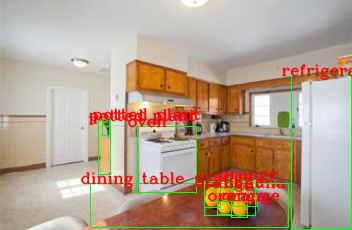

In [21]:
cv2_imshow(igg)